In [ ]:
###### Step1. I have bank data from 2009 to 2014. First we will do EDA and data validation.First of all we will identify which are numeric variables and how many are categorical variables.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
data=pd.read_csv("C:\\Users\\Dell 5370\\Desktop\\bank.csv")

In [5]:
data.head()

,Obs,account_id,cardwdln,cardwdlt,cashcrn,cashcrt,cashwdn,cashwdt,bankcolt,bankcoln,...,bankrtd,othcrnd,othcrtd,acardwdl,acashcr,acashwd,abankcol,abankr,aothcr,good
0,1,2,0,0,12,48400.0,237,1001191.0,1537936,70,...,259.248,0.032802,5.0223,0.0,4033.33,4224.43,21970.51,6216.12,153.107,Yes
1,2,19,0,0,17,45800.0,143,762135.7,741807,45,...,14.799,0.065982,4.0965,0.0,2694.12,5329.62,16484.60,2523.20,62.084,No
2,3,25,0,0,54,1488172.0,99,1215437.6,0,0,...,280.740,0.031603,6.9979,0.0,27558.74,12277.15,0.00,2674.57,221.432,Yes
3,4,37,0,0,19,494494.0,51,375845.2,0,0,...,150.559,0.034000,5.0704,0.0,26026.00,7369.51,0.00,1750.69,149.129,No
4,5,38,0,0,14,49700.0,37,156679.0,256060,17,...,209.815,0.033333,4.9124,0.0,3550.00,4234.57,15062.35,2377.90,147.371,Yes


######  Here the first two columns obs and account_id should not have any impact on the output. So we can drop the first two columns.

In [6]:
data.drop(['Obs','account_id'],axis=1, inplace=True)


print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 38 columns):
cardwdln     682 non-null int64
cardwdlt     682 non-null int64
cashcrn      682 non-null int64
cashcrt      682 non-null float64
cashwdn      682 non-null int64
cashwdt      682 non-null float64
bankcolt     682 non-null int64
bankcoln     682 non-null int64
bankrn       682 non-null int64
bankrt       682 non-null float64
othcrn       682 non-null int64
othcrt       682 non-null float64
days         682 non-null int64
sex          682 non-null object
card         682 non-null object
age          682 non-null float64
second       682 non-null object
frequency    682 non-null object
region       682 non-null object
cardwdlnd    682 non-null float64
cardwdltd    682 non-null float64
cashcrnd     682 non-null float64
cashcrtd     682 non-null float64
cashwdnd     682 non-null float64
cashwdtd     682 non-null float64
bankcoltd    682 non-null float64
bankcolnd    682 non-null float64


In [7]:
data.columns

Index(['cardwdln', 'cardwdlt', 'cashcrn', 'cashcrt', 'cashwdn', 'cashwdt',
       'bankcolt', 'bankcoln', 'bankrn', 'bankrt', 'othcrn', 'othcrt', 'days',
       'sex', 'card', 'age', 'second', 'frequency', 'region', 'cardwdlnd',
       'cardwdltd', 'cashcrnd', 'cashcrtd', 'cashwdnd', 'cashwdtd',
       'bankcoltd', 'bankcolnd', 'bankrnd', 'bankrtd', 'othcrnd', 'othcrtd',
       'acardwdl', 'acashcr', 'acashwd', 'abankcol', 'abankr', 'aothcr',
       'good'],
      dtype='object')

###### 5 are categorical variables and 33 are numeric variables. There are no missing values. 682 observations are there and 38 columns out of which 37 are features and 1 is target variable.

In [8]:
#print the categorical variables if any one of them contains too many unique values. 
#In such cases we have to do something to reduce the unique values by clubing some of them together.
print('Sex=',data['sex'].unique())
print('card=',data['card'].unique())
print('Second=',data['second'].unique())
print('Frequency=',data['frequency'].unique())
print('Region=',data['region'].unique())
print('good=',data['good'].unique())

Sex= ['M' 'F']
card= ['no' 'yes']
Second= ['Y' 'N']
Frequency= ['Monthly' 'Weekly' 'After_Tr']
Region= ['Prague' 'south Bohemia' 'north Moravia' 'east Bohemia' 'north Bohemia'
 'south Moravia' 'west Bohemia' 'central Bohemia']
good= ['Yes' 'No']


###### We have confirmed the basic sanity of the data.Now we will do some visualisations.

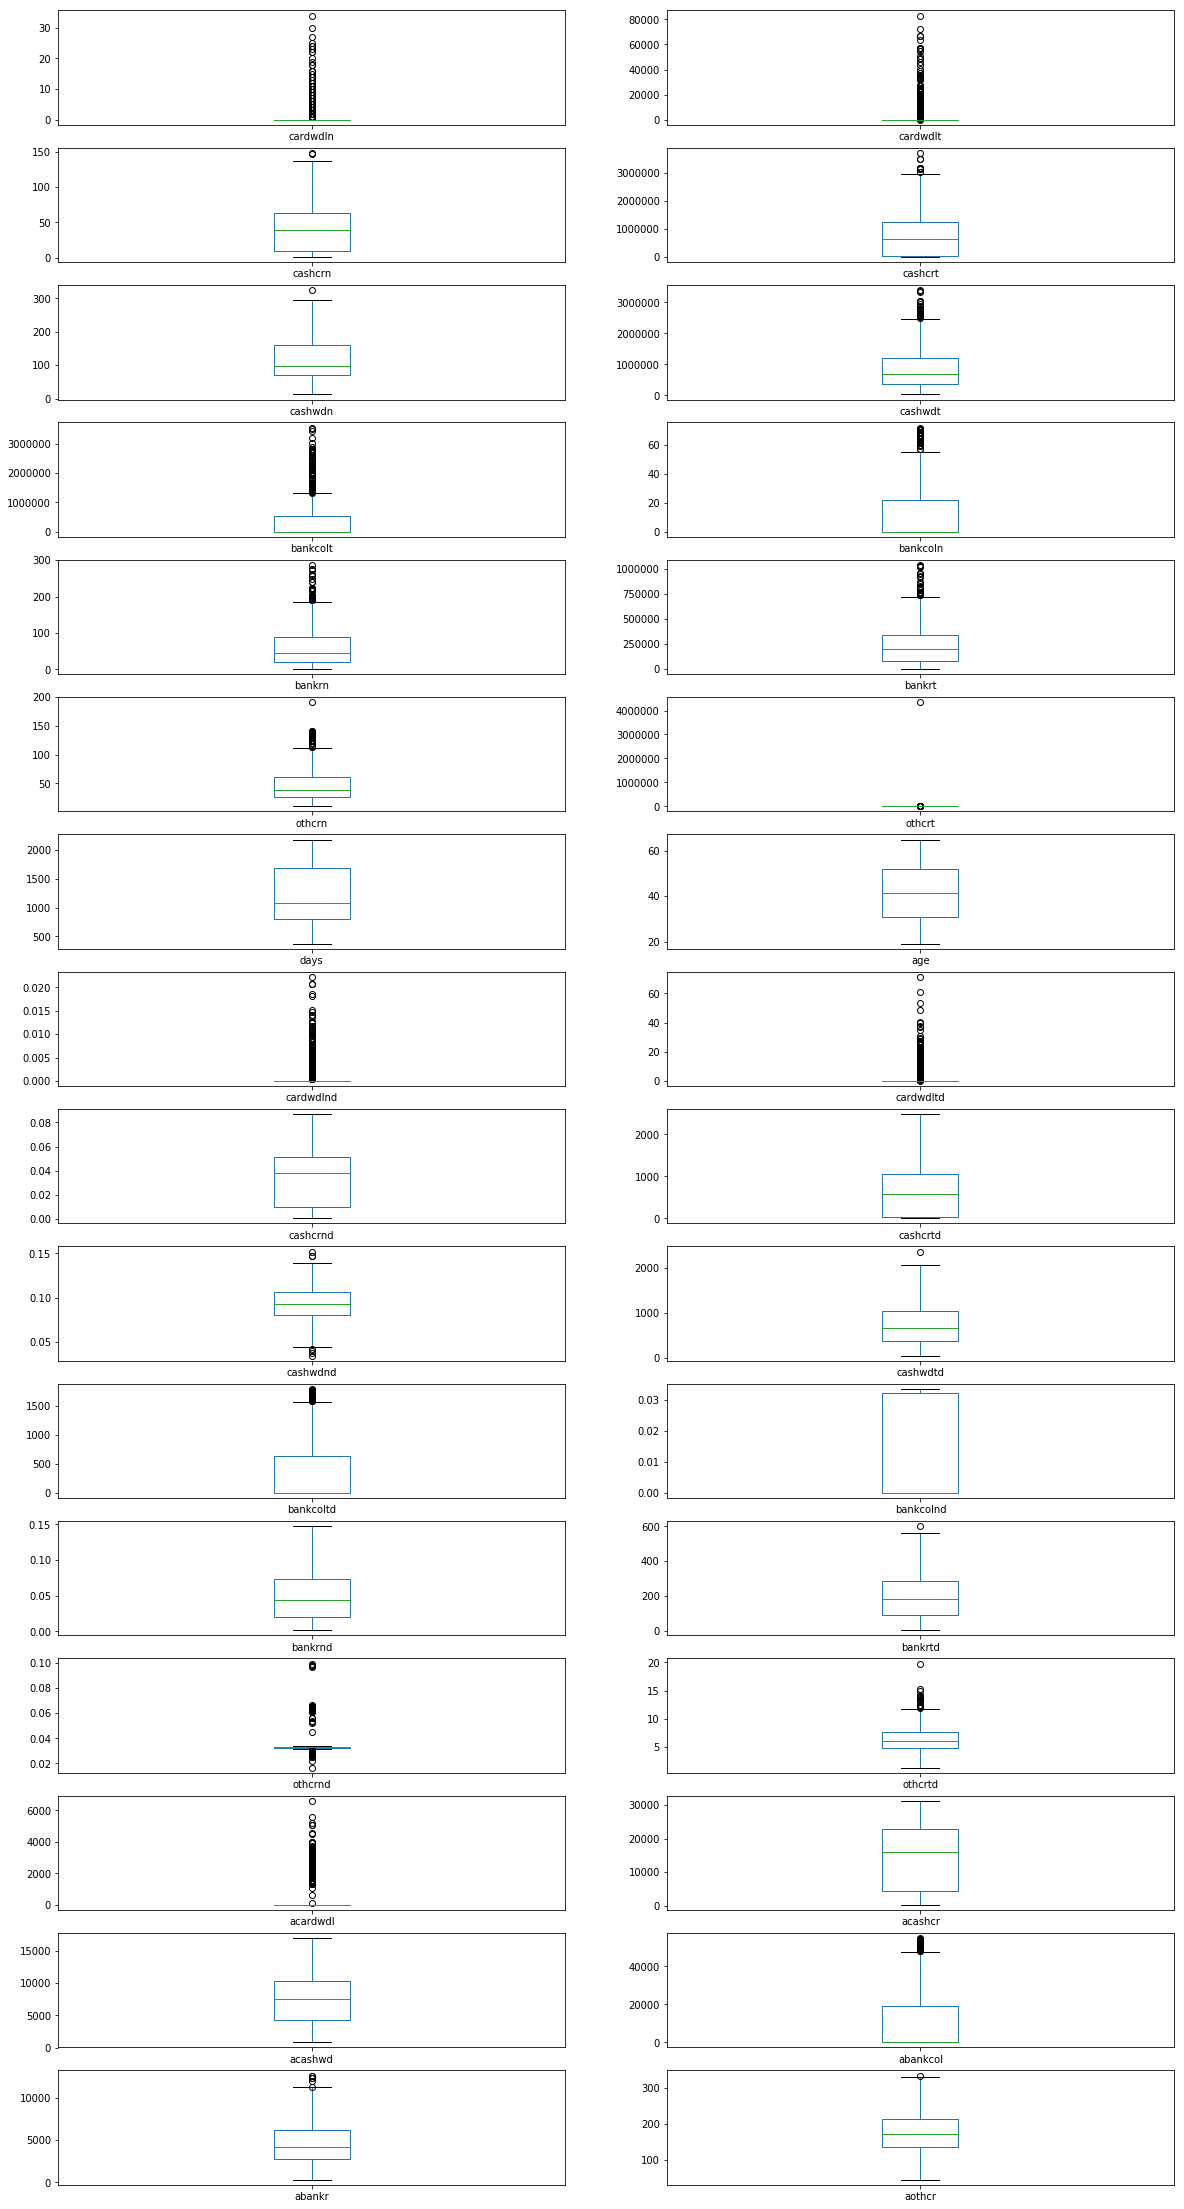

In [9]:
data.plot(kind='box', subplots=True, layout=(16,2), sharex=False, sharey=False,figsize=(20, 40))
plt.show()

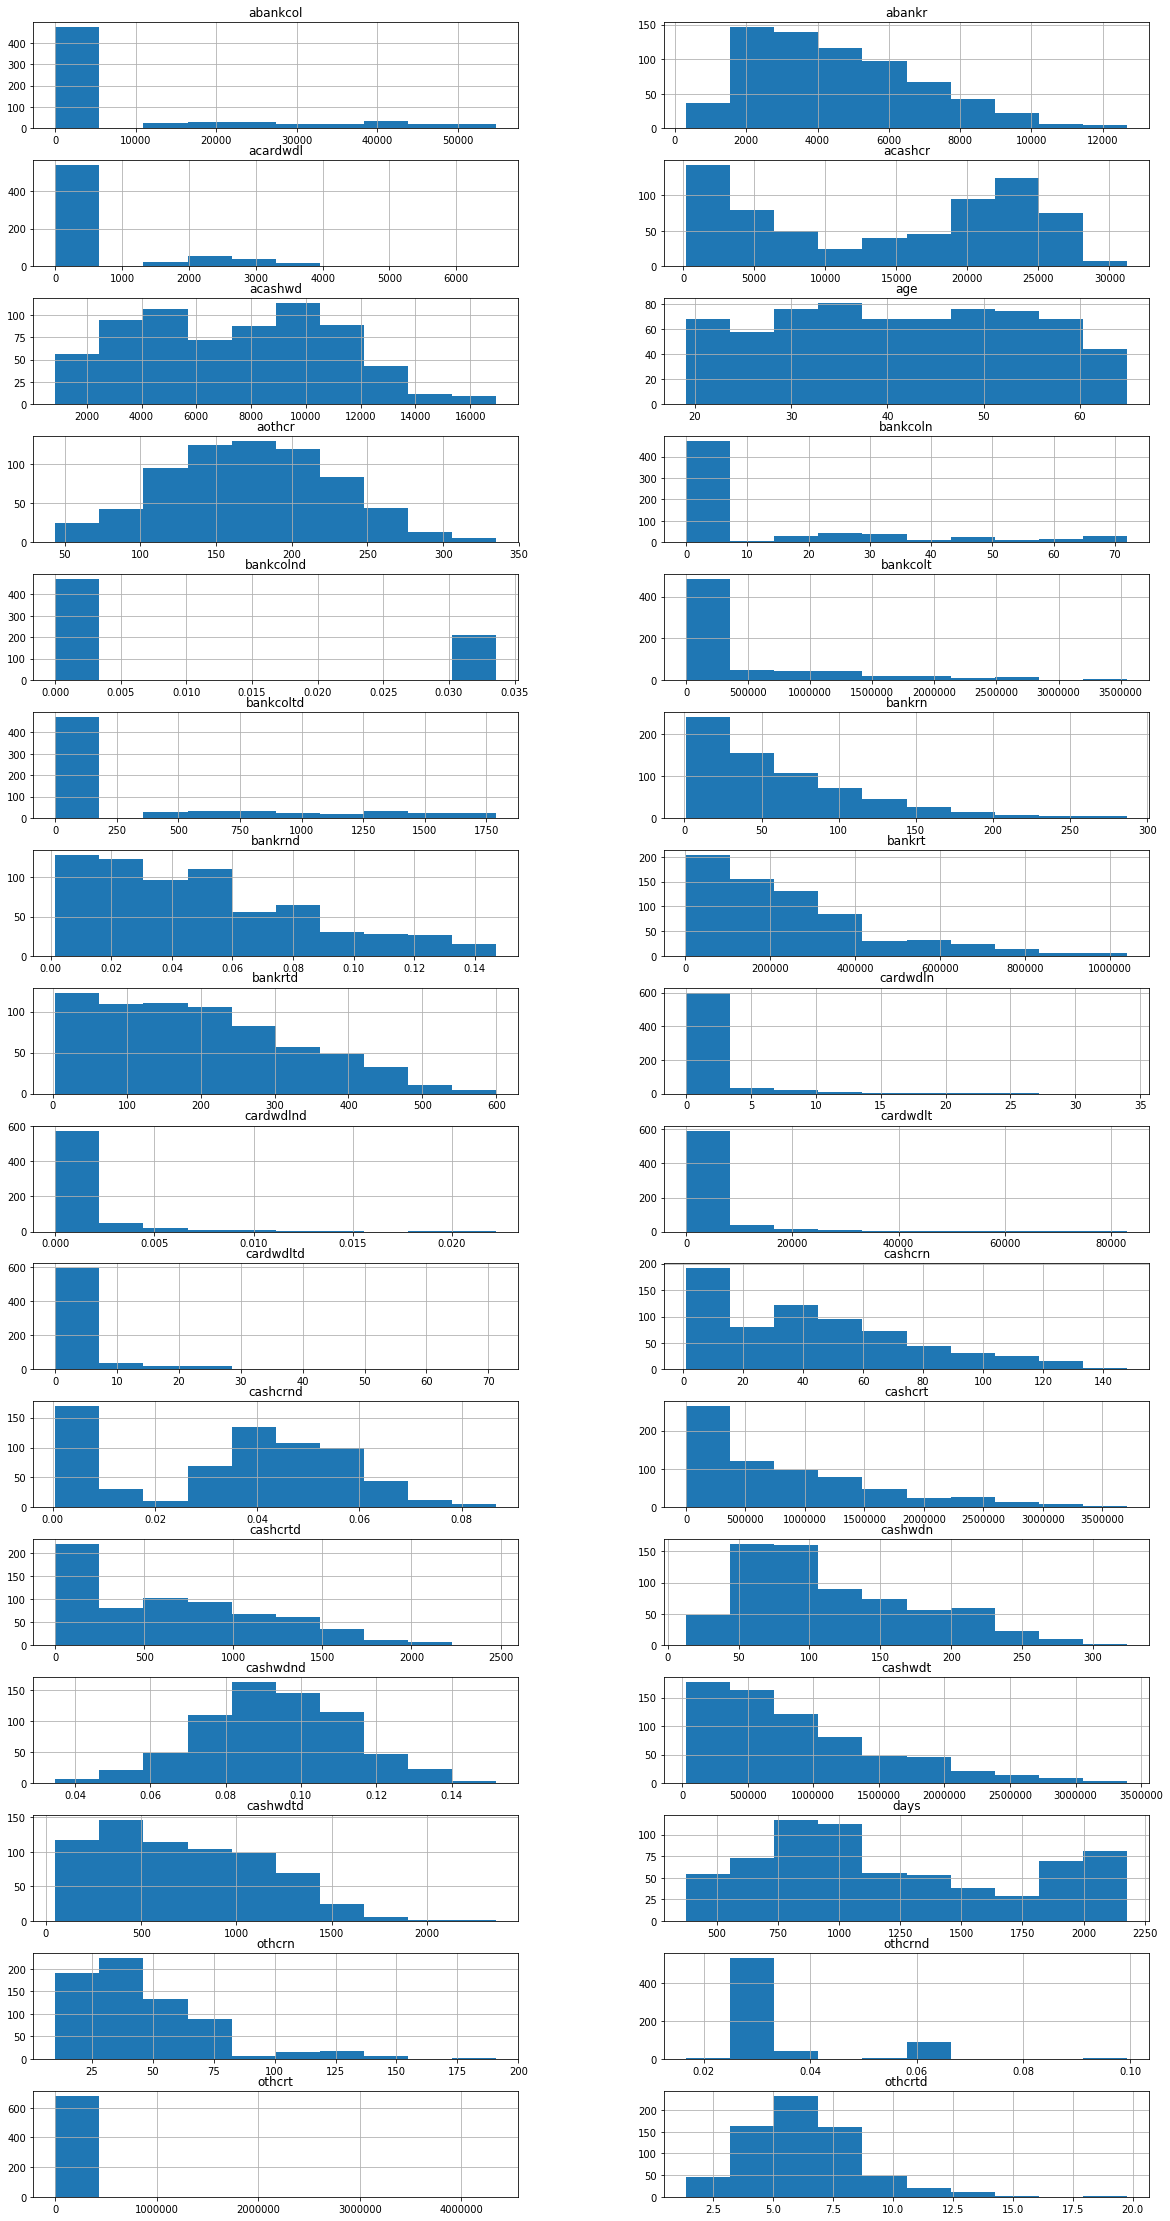

In [10]:
data.hist(layout=(16,2),figsize=(20, 40))
plt.show()

In [11]:
data.describe()

,cardwdln,cardwdlt,cashcrn,cashcrt,cashwdn,cashwdt,bankcolt,bankcoln,bankrn,bankrt,...,bankrnd,bankrtd,othcrnd,othcrtd,acardwdl,acashcr,acashwd,abankcol,abankr,aothcr
count,682.000000,682.000000,682.000000,6.820000e+02,682.000000,6.820000e+02,6.820000e+02,682.000000,682.000000,6.820000e+02,...,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,1.414956,3640.175953,42.523460,7.964454e+05,116.917889,8.883424e+05,3.833494e+05,11.885630,62.181818,2.451537e+05,...,0.050176,198.678490,0.037338,6.299555,574.050117,14153.832654,7421.009795,9962.577801,4589.740235,173.591041
std,4.098560,10510.752426,33.808959,7.961603e+05,61.467198,6.698405e+05,7.106200e+05,20.297677,54.389165,2.055473e+05,...,0.035220,130.654384,0.012456,2.338979,1165.029559,9334.176765,3590.422263,16517.222931,2357.649331,55.360748
min,0.000000,0.000000,1.000000,2.000000e+02,13.000000,3.050220e+04,0.000000e+00,0.000000,1.000000,1.901000e+03,...,0.001450,3.091000,0.016690,1.364400,0.000000,200.000000,850.330000,0.000000,312.000000,43.895000
25%,0.000000,0.000000,10.000000,4.080000e+04,70.000000,3.545102e+05,0.000000e+00,0.000000,21.000000,8.524845e+04,...,0.019885,88.044000,0.032407,4.765950,0.000000,4283.250000,4371.040000,0.000000,2722.860000,133.885250
50%,0.000000,0.000000,39.000000,6.276590e+05,99.000000,7.008136e+05,0.000000e+00,0.000000,44.500000,1.963218e+05,...,0.043400,182.086000,0.032757,6.088000,0.000000,15970.000000,7518.560000,0.000000,4211.305000,172.742500
75%,0.000000,0.000000,63.000000,1.235188e+06,161.000000,1.206393e+06,5.276402e+05,22.000000,88.000000,3.419209e+05,...,0.073330,284.112750,0.033154,7.596000,0.000000,22850.652500,10264.882500,19122.007500,6170.060000,212.773000
max,34.000000,83000.000000,148.000000,3.708832e+06,324.000000,3.392850e+06,3.552197e+06,72.000000,287.000000,1.040262e+06,...,0.147180,600.155000,0.099469,19.768400,6600.000000,31247.580000,16958.030000,54824.500000,12682.870000,335.129000


In [12]:
data.cov()

,cardwdln,cardwdlt,cashcrn,cashcrt,cashwdn,cashwdt,bankcolt,bankcoln,bankrn,bankrt,...,bankrnd,bankrtd,othcrnd,othcrtd,acardwdl,acashcr,acashwd,abankcol,abankr,aothcr
cardwdln,16.798190,4.175893e+04,7.108459e+00,2.837741e+05,3.461856e+01,4.291605e+05,2.487750e+05,2.840480e+00,2.128421e+01,4.390280e+04,...,0.005922,-9.267697e+00,-0.000767,2.125164,2.832072e+03,2.765733e+03,1.248661e+03,2.526469e+03,-8.205286e+02,6.233457e+01
cardwdlt,41758.928348,1.104759e+08,1.241932e+04,6.287861e+08,9.173355e+04,1.254574e+09,8.843629e+08,1.292193e+04,4.792763e+04,1.014267e+08,...,12.166970,-2.628331e+04,-3.387330,5825.791388,7.944807e+06,5.368517e+06,4.463812e+06,1.269221e+07,-1.733974e+06,1.771715e+05
cashcrn,7.108459,1.241932e+04,1.143046e+03,2.395113e+07,1.016185e+03,8.630951e+06,-1.392162e+07,-4.122631e+02,4.594216e+02,1.375630e+06,...,0.020031,-2.201681e+02,0.007968,5.332245,-2.643237e+02,1.948612e+05,2.274001e+03,-3.721780e+05,-5.249067e+03,3.159856e+01
cashcrt,283774.119996,6.287861e+08,2.395113e+07,6.338713e+11,2.325112e+07,3.121917e+11,-2.949235e+11,-9.052729e+06,4.867020e+06,2.401536e+10,...,-1940.884368,-4.378091e+06,73.644075,447303.798511,6.868503e+07,5.869329e+09,9.679952e+08,-7.726585e+09,6.710194e+07,1.059181e+07
cashwdn,34.618557,9.173355e+04,1.016185e+03,2.325112e+07,3.778216e+03,3.152388e+07,1.331333e+07,3.477835e+02,1.079589e+03,4.870257e+06,...,-0.163646,-4.150346e+02,0.062959,34.559170,4.267246e+03,5.738149e+04,2.072403e+04,6.431118e+04,3.459085e+03,6.279063e+02
cashwdt,429160.475684,1.254574e+09,8.630951e+06,3.121917e+11,3.152388e+07,4.486863e+11,1.650125e+11,2.895702e+06,5.720579e+05,2.418969e+10,...,-5558.668244,-7.934777e+06,109.887973,737570.988720,1.515641e+08,1.720201e+09,1.530003e+09,2.148103e+09,2.794262e+08,1.932036e+07
bankcolt,248775.049042,8.843629e+08,-1.392162e+07,-2.949235e+11,1.331333e+07,1.650125e+11,5.049808e+11,1.321166e+07,3.471449e+06,4.253350e+10,...,-162.237663,1.818810e+07,-99.417446,312003.200244,9.405498e+07,-4.254110e+09,5.062777e+08,1.037428e+10,3.560717e+08,9.591009e+06
bankcoln,2.840480,1.292193e+04,-4.122631e+02,-9.052729e+06,3.477835e+02,2.895702e+06,1.321166e+07,4.119957e+02,1.323380e+02,1.240419e+06,...,0.008701,4.816959e+02,0.006464,2.993517,8.631722e+02,-1.311115e+05,2.887419e+03,2.653269e+05,6.612055e+03,9.086440e+01
bankrn,21.284208,4.792763e+04,4.594216e+02,4.867020e+06,1.079589e+03,5.720579e+05,3.471449e+06,1.323380e+02,2.958181e+03,7.816448e+06,...,1.594486,3.454077e+03,-0.014226,-15.973500,-2.589155e+03,-3.483943e+04,-5.594291e+04,-3.616882e+04,-4.030384e+04,-4.412829e+02
bankrt,43902.802841,1.014267e+08,1.375630e+06,2.401536e+10,4.870257e+06,2.418969e+10,4.253350e+10,1.240419e+06,7.816448e+06,4.224968e+10,...,3507.523601,2.170931e+07,-80.581784,-6843.278710,-4.541516e+06,-1.412813e+08,-8.452560e+07,4.446714e+08,1.396501e+08,-1.340118e+05


In [13]:
data.kurtosis()

cardwdln      20.123161
cardwdlt      18.624095
cashcrn       -0.342262
cashcrt        0.597204
cashwdn       -0.279915
cashwdt        0.905055
bankcolt       3.634594
bankcoln       1.189602
bankrn         2.074571
bankrt         1.666862
othcrn         3.375370
othcrt       680.865651
days          -1.133008
age           -1.142675
cardwdlnd     15.805437
cardwdltd     20.796351
cashcrnd      -1.100812
cashcrtd      -0.596214
cashwdnd      -0.026374
cashwdtd      -0.496219
bankcoltd      0.404313
bankcolnd     -1.306391
bankrnd       -0.296355
bankrtd       -0.508840
othcrnd        5.145844
othcrtd        2.372778
acardwdl       2.770576
acashcr       -1.563058
acashwd       -0.890314
abankcol       0.399974
abankr         0.072172
aothcr        -0.406529
dtype: float64

In [14]:
data.skew()

cardwdln      4.163910
cardwdlt      4.058582
cashcrn       0.636199
cashcrt       1.066390
cashwdn       0.731939
cashwdt       1.132872
bankcolt      2.029932
bankcoln      1.557739
bankrn        1.435638
bankrt        1.338442
othcrn        1.628444
othcrt       26.082627
days          0.392476
age           0.005981
cardwdlnd     3.684165
cardwdltd     4.000457
cashcrnd     -0.254937
cashcrtd      0.522146
cashwdnd     -0.081042
cashwdtd      0.463648
bankcoltd     1.369774
bankcolnd     0.834618
bankrnd       0.734049
bankrtd       0.538220
othcrnd       2.357087
othcrtd       0.976754
acardwdl      1.890530
acashcr      -0.135474
acashwd       0.142676
abankcol      1.369148
abankr        0.702417
aothcr        0.064614
dtype: float64

###### From the boxplots the following features seems to have outliars: 1)cardwdln 2)cardwdlt 3)bankcolt 4) bankrn 5)cardwdlnd 6)othcrnd 7)acardwdl 8)cashwdt 9) cardwdltd . These are the main columns with outliars. We will calculate the z-score of each elements of these columns and replace them with the corresponding median.

In [15]:
from scipy import stats
z1=stats.zscore(data['cardwdln'])
z2=stats.zscore(data['cardwdlt'])
z3=stats.zscore(data['bankcolt'])
z4=stats.zscore(data['bankrn'])
z5=stats.zscore(data['cardwdlnd'])
z6=stats.zscore(data['othcrnd'])
z7=stats.zscore(data['acardwdl'])
z8=stats.zscore(data['cashwdt'])
z9=stats.zscore(data['cardwdltd'])


In [16]:
#insert the calculated z-Score into the dataframe
data.insert(0,"Z-Score_cardwdln", list(z1), True)
data.insert(0,"Z-Score_cardwdlt", list(z2), True) 
data.insert(0,"Z-Score_bankcolt", list(z3), True) 
data.insert(0,"Z-Score_bankrn", list(z4), True) 
data.insert(0,"Z-Score_cardwdlnd", list(z5), True) 
data.insert(0,"Z-Score_othcrnd", list(z6), True) 
data.insert(0,"Z-Score_acardwdl", list(z7), True) 
data.insert(0,"Z-Score_cashwdt", list(z8), True) 
data.insert(0,"Z-Score_cardwdltd", list(z9), True) 

In [17]:
data.head()

,Z-Score_cardwdltd,Z-Score_cashwdt,Z-Score_acardwdl,Z-Score_othcrnd,Z-Score_cardwdlnd,Z-Score_bankrn,Z-Score_bankcolt,Z-Score_cardwdlt,Z-Score_cardwdln,cardwdln,...,bankrtd,othcrnd,othcrtd,acardwdl,acashcr,acashwd,abankcol,abankr,aothcr,good
0,-0.371805,0.168594,-0.493096,-0.364392,-0.375866,0.493441,1.625952,-0.346583,-0.345486,0,...,259.248,0.032802,5.0223,0.0,4033.33,4224.43,21970.51,6216.12,153.107,Yes
1,-0.371805,-0.188551,-0.493096,2.301322,-0.375866,-0.996919,0.504800,-0.346583,-0.345486,0,...,14.799,0.065982,4.0965,0.0,2694.12,5329.62,16484.60,2523.20,62.084,No
2,-0.371805,0.488676,-0.493096,-0.460721,-0.375866,0.567039,-0.539854,-0.346583,-0.345486,0,...,280.740,0.031603,6.9979,0.0,27558.74,12277.15,0.00,2674.57,221.432,Yes
3,-0.371805,-0.765665,-0.493096,-0.268143,-0.375866,-0.352936,-0.539854,-0.346583,-0.345486,0,...,150.559,0.034000,5.0704,0.0,26026.00,7369.51,0.00,1750.69,149.129,No
4,-0.371805,-1.093097,-0.493096,-0.321731,-0.375866,-0.316137,-0.179256,-0.346583,-0.345486,0,...,209.815,0.033333,4.9124,0.0,3550.00,4234.57,15062.35,2377.90,147.371,Yes


In [18]:
#testing How I can filter out the high z-scores from a single column
data[data['Z-Score_cardwdltd']>1.96]['cardwdltd']

13     21.4497
33     38.0020
88     34.7468
98     25.2688
120    20.0369
123    18.8229
159    26.6458
171    61.0638
174    23.3539
178    27.3873
181    20.5993
186    23.2605
244    26.8293
282    25.9766
331    21.6763
345    29.3167
351    25.9847
362    26.9399
387    19.5755
446    31.0874
455    29.0346
456    53.6694
458    23.2932
498    40.4617
531    21.4921
557    23.0097
588    22.0751
589    24.8212
621    48.3245
625    27.0613
629    71.3058
634    21.3389
650    18.7013
655    39.5480
661    21.8575
670    19.1860
680    36.9845
Name: cardwdltd, dtype: float64

In [19]:
# Filtering out the extreme z-scores from the required columns 
# and imputing NaN values in the corresponding columns

data.loc[data['Z-Score_cardwdln']>1.96,'cardwdln']=np.nan
data.loc[data['Z-Score_cardwdln']<-1.96,'cardwdln']=np.nan

data.loc[data['Z-Score_cardwdlt']>1.96,'cardwdlt']=np.nan
data.loc[data['Z-Score_cardwdlt']<-1.96,'cardwdlt']=np.nan

data.loc[data['Z-Score_bankcolt']>1.96,'bankcolt']=np.nan
data.loc[data['Z-Score_bankcolt']<-1.96,'bankcolt']=np.nan

data.loc[data['Z-Score_bankrn']>1.96,'bankrn']=np.nan
data.loc[data['Z-Score_bankrn']<-1.96,'bankrn']=np.nan

data.loc[data['Z-Score_cardwdlnd']>1.96,'cardwdlnd']=np.nan
data.loc[data['Z-Score_cardwdlnd']<-1.96,'cardwdlnd']=np.nan

data.loc[data['Z-Score_othcrnd']>1.96,'othcrnd']=np.nan
data.loc[data['Z-Score_othcrnd']<-1.96,'othcrnd']=np.nan

data.loc[data['Z-Score_acardwdl']>1.96,'acardwdl']=np.nan
data.loc[data['Z-Score_acardwdl']<-1.96,'acardwdl']=np.nan

data.loc[data['Z-Score_cashwdt']>1.96,'cashwdt']=np.nan
data.loc[data['Z-Score_cashwdt']<-1.96,'cashwdt']=np.nan

data.loc[data['Z-Score_cardwdltd']>1.96,'cardwdltd']=np.nan
data.loc[data['Z-Score_cardwdltd']<-1.96,'cardwdltd']=np.nan

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 47 columns):
Z-Score_cardwdltd    682 non-null float64
Z-Score_cashwdt      682 non-null float64
Z-Score_acardwdl     682 non-null float64
Z-Score_othcrnd      682 non-null float64
Z-Score_cardwdlnd    682 non-null float64
Z-Score_bankrn       682 non-null float64
Z-Score_bankcolt     682 non-null float64
Z-Score_cardwdlt     682 non-null float64
Z-Score_cardwdln     682 non-null float64
cardwdln             647 non-null float64
cardwdlt             648 non-null float64
cashcrn              682 non-null int64
cashcrt              682 non-null float64
cashwdn              682 non-null int64
cashwdt              645 non-null float64
bankcolt             635 non-null float64
bankcoln             682 non-null int64
bankrn               647 non-null float64
bankrt               682 non-null float64
othcrn               682 non-null int64
othcrt               682 non-null float64
days                 

###### We See that those columns has some blank values in them now.

In [21]:
# save a copy of the data to disc.
data.to_csv('see.csv')

In [22]:
data['bankrn'].median()


42.0

In [23]:
# imputing the median values in place of the NaN values
data['cardwdln']=data['cardwdln'].fillna(data['cardwdln'].median())
data['cardwdlt']=data['cardwdlt'].fillna(data['cardwdlt'].median())
data['bankcolt']=data['bankcolt'].fillna(data['bankcolt'].median())
data['bankrn']=data['bankrn'].fillna(data['bankrn'].median())
data['cardwdlnd']=data['cardwdlnd'].fillna(data['cardwdlnd'].median())
data['othcrnd']=data['othcrnd'].fillna(data['othcrnd'].median())
data['acardwdl']=data['acardwdl'].fillna(data['acardwdl'].median())
data['cashwdt']=data['cashwdt'].fillna(data['cashwdt'].median())
data['cardwdltd']=data['cardwdltd'].fillna(data['cardwdltd'].median())


In [24]:
# getting rid of the z-Score columns
data=data.drop(['Z-Score_cardwdltd', 'Z-Score_cashwdt','Z-Score_acardwdl','Z-Score_othcrnd','Z-Score_cardwdlnd','Z-Score_bankrn','Z-Score_bankcolt','Z-Score_cardwdlt','Z-Score_cardwdln'], axis=1)
data.shape


(682, 38)

###### Check again whether the data quality has improved or not after having removed the outliars.

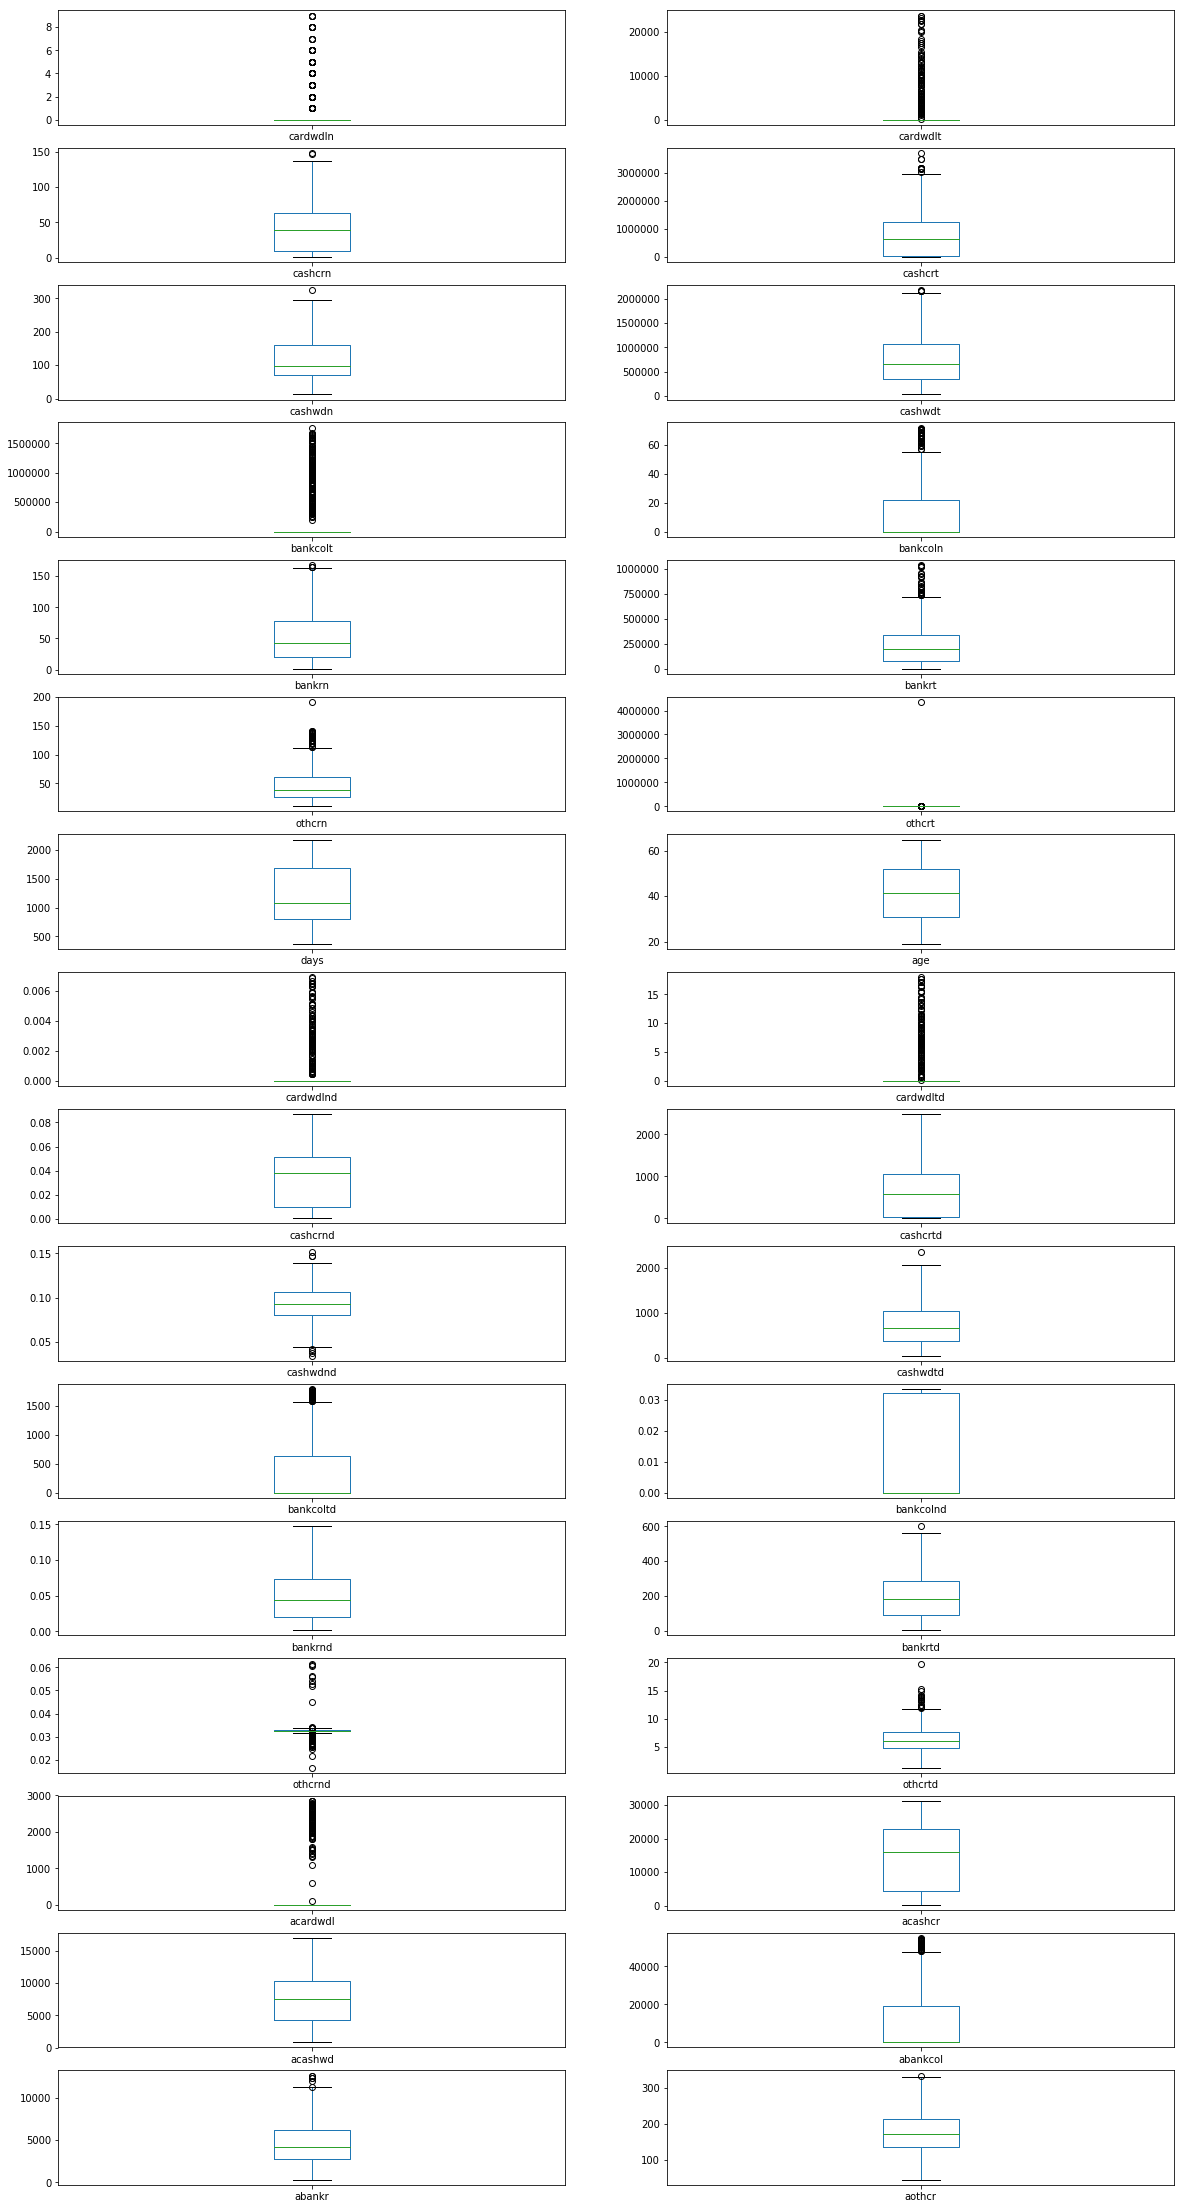

In [25]:
data.plot(kind='box', subplots=True, layout=(16,2), sharex=False, sharey=False,figsize=(20, 40))
plt.show()

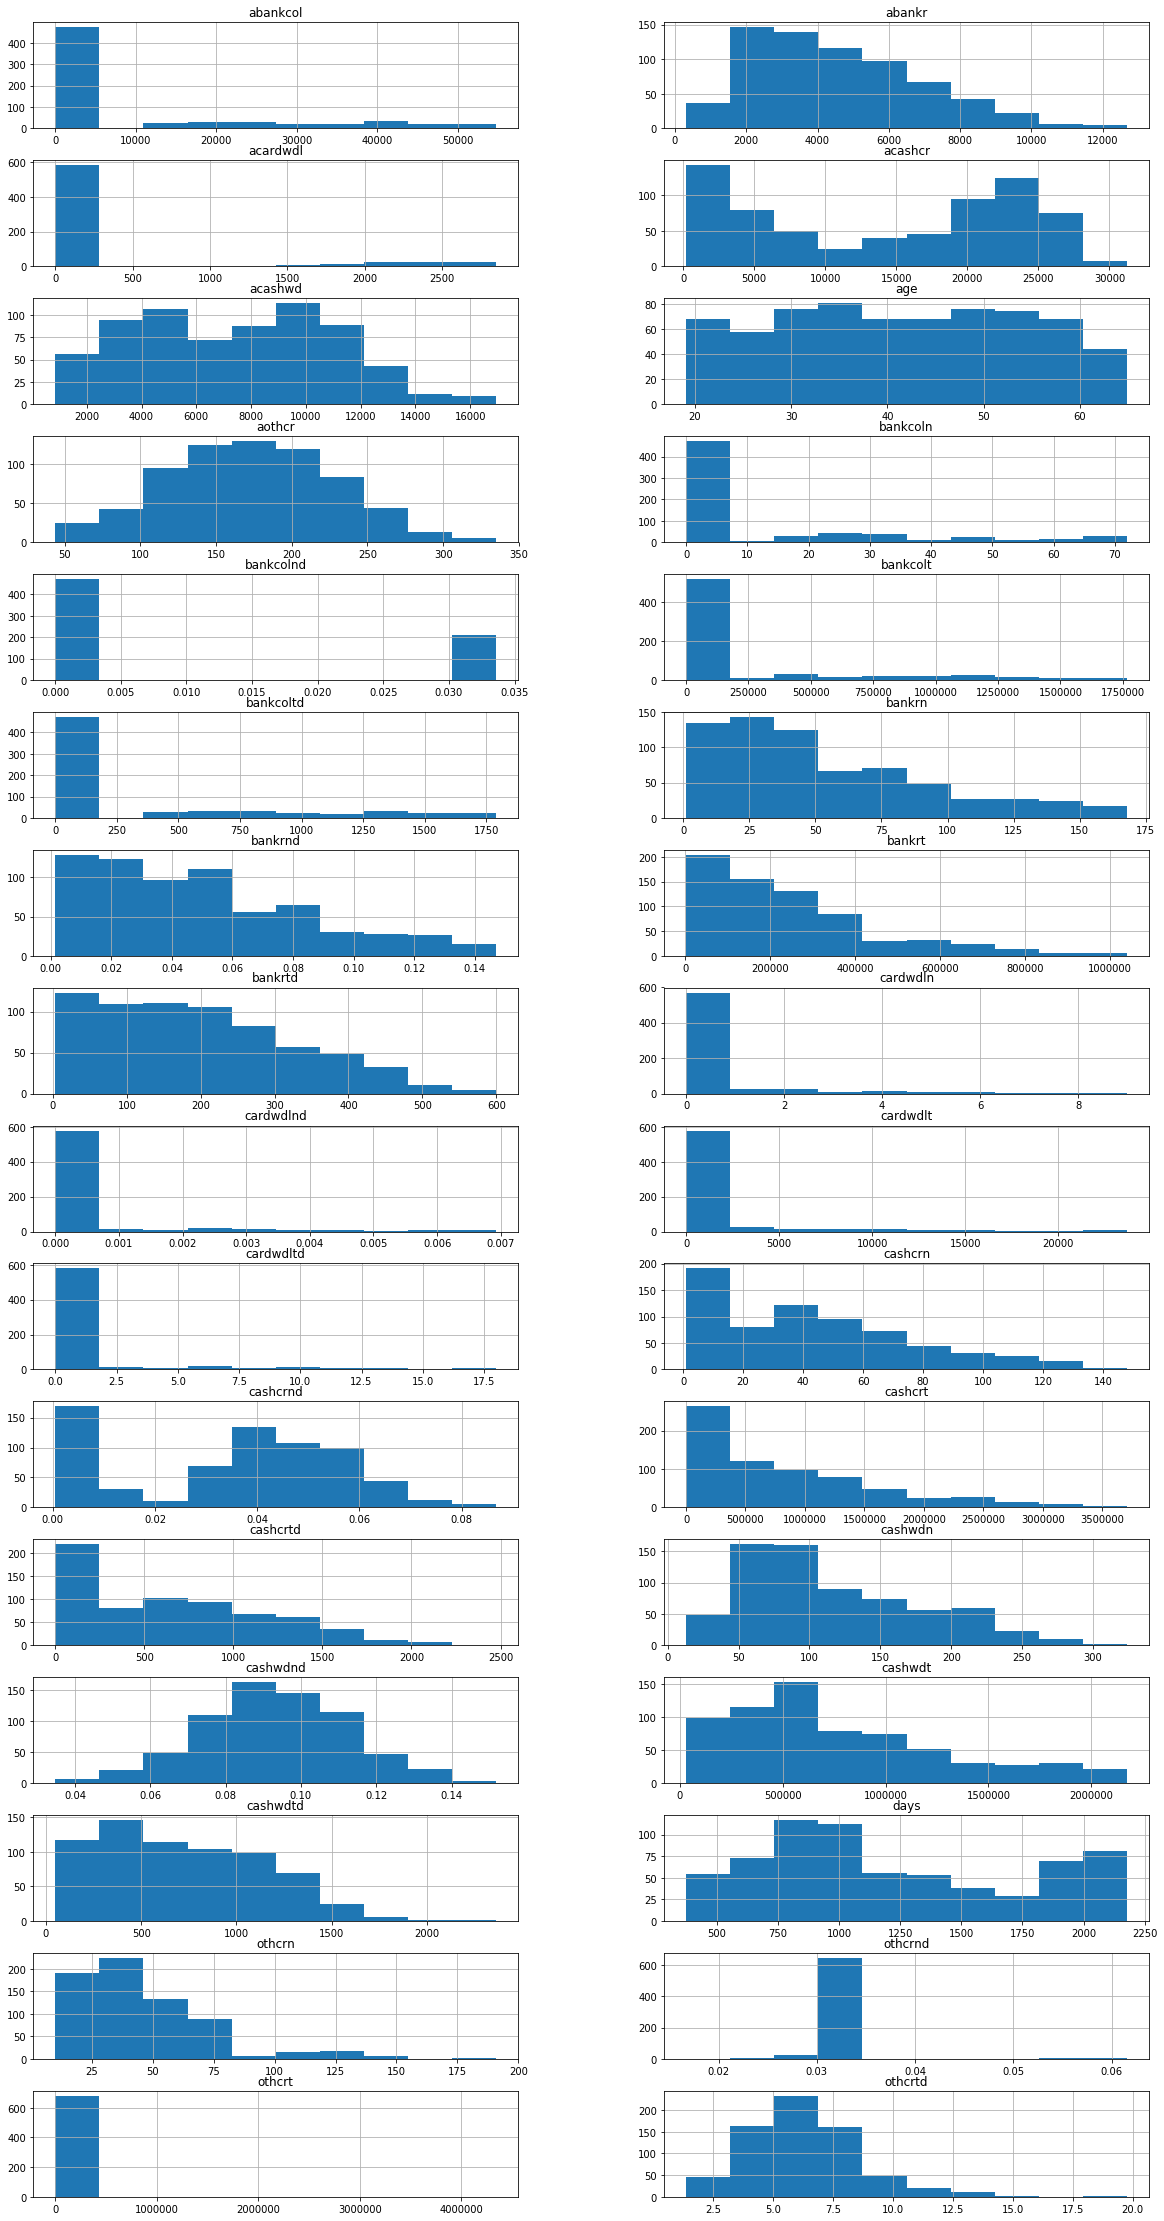

In [27]:
data.hist(layout=(16,2),figsize=(20, 40))
plt.show()

######  After removing the outliars data doesnot seem to be improved much. However we will start modelling now.

In [28]:
# Split the features and the target variables first

X=data.iloc[:,0:37]
y=data.iloc[:,-1]

In [29]:
X.head()

,cardwdln,cardwdlt,cashcrn,cashcrt,cashwdn,cashwdt,bankcolt,bankcoln,bankrn,bankrt,...,bankrnd,bankrtd,othcrnd,othcrtd,acardwdl,acashcr,acashwd,abankcol,abankr,aothcr
0,0.0,0.0,12,48400.0,237,1001191.0,1537936.0,70,89.0,553234.8,...,0.04171,259.248,0.032802,5.0223,0.0,4033.33,4224.43,21970.51,6216.12,153.107
1,0.0,0.0,17,45800.0,143,762135.7,741807.0,45,8.0,20185.6,...,0.00587,14.799,0.032677,4.0965,0.0,2694.12,5329.62,16484.60,2523.20,62.084
2,0.0,0.0,54,1488172.0,99,1215437.6,0.0,0,93.0,248735.4,...,0.10497,280.740,0.031603,6.9979,0.0,27558.74,12277.15,0.00,2674.57,221.432
3,0.0,0.0,19,494494.0,51,375845.2,0.0,0,43.0,75279.5,...,0.08600,150.559,0.034000,5.0704,0.0,26026.00,7369.51,0.00,1750.69,149.129
4,0.0,0.0,14,49700.0,37,156679.0,256060.0,17,45.0,107005.4,...,0.08824,209.815,0.033333,4.9124,0.0,3550.00,4234.57,15062.35,2377.90,147.371


###### But we have categorical variables in the training data set. and those variables are 1)sex 2)card 3)second 4) frequency 5) region .  So we have to do do label encoding here. We also have to do label encoding for the target variable.

###### The following code will create dummy variables and also give appropriate column names for them. You just input the list of columns to be encoded.

In [30]:
cat_vars=['sex','card','second','frequency','region']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(X[var], prefix=var)
    data1=X.join(cat_list)
    X=data1
cat_vars=['sex','card','second','frequency','region']
data_vars=X.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [31]:
#Our final data columns will be:

X_data_final=X[to_keep]
X_data_final.columns.values

array(['cardwdln', 'cardwdlt', 'cashcrn', 'cashcrt', 'cashwdn', 'cashwdt',
       'bankcolt', 'bankcoln', 'bankrn', 'bankrt', 'othcrn', 'othcrt',
       'days', 'age', 'cardwdlnd', 'cardwdltd', 'cashcrnd', 'cashcrtd',
       'cashwdnd', 'cashwdtd', 'bankcoltd', 'bankcolnd', 'bankrnd',
       'bankrtd', 'othcrnd', 'othcrtd', 'acardwdl', 'acashcr', 'acashwd',
       'abankcol', 'abankr', 'aothcr', 'sex_F', 'sex_M', 'card_no',
       'card_yes', 'second_N', 'second_Y', 'frequency_After_Tr',
       'frequency_Monthly', 'frequency_Weekly', 'region_Prague',
       'region_central Bohemia', 'region_east Bohemia',
       'region_north Bohemia', 'region_north Moravia',
       'region_south Bohemia', 'region_south Moravia',
       'region_west Bohemia'], dtype=object)

In [32]:
#Encode the y variable as well
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
y_data_final=labelencoder_y.fit_transform(y)
y_data_final

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

###### Now we are good to do the modelling

In [35]:

from sklearn.metrics import confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [36]:
# Creating test- Train splits
X_train,X_test,y_train,y_test=train_test_split(X_data_final,y_data_final,test_size=0.4, random_state=42)

# create the claassifier
logreg=LogisticRegression(max_iter=500)

#fit the classifier to the training data
logreg.fit(X_train,y_train)

#predict th lebels of the test set
y_pred=logreg.predict(X_test)

# compute and print the confision martis and the classification report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 17  15]
 [  5 236]]
             precision    recall  f1-score   support

          0       0.77      0.53      0.63        32
          1       0.94      0.98      0.96       241

avg / total       0.92      0.93      0.92       273



######  So in the first attempt the precision of the model is 0.81 for 0 and 0.93 for 1.  For 0 the precision is 0.81 and for 1 the precision is 0.93. But the f1 score of 0 is poor only 0.54%. That means it is not clasifying the 0s correctly. With default number of iterations (100 iterations) the algo was failing to converge. When I increased the iterations to 500, it got converged.

In [38]:
logreg.score(X_test,y_test)

0.9267399267399268

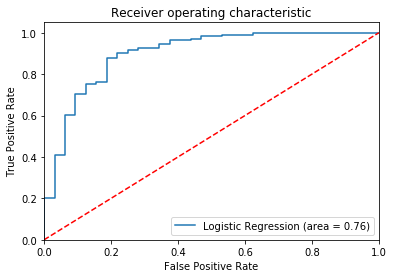

In [39]:
# ROC Curve -----

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

######  The score is good because it is classifying most of the yes correctly. But actually the model performance is not so good. Let us see if we can discard any non significant variables:


In [40]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit(maxiter=100)
print(result.summary2())

         Current function value: 0.106702
         Iterations: 100
                               Results: Logit
Model:                  Logit                Pseudo R-squared:     0.687     
Dependent Variable:     y                    AIC:                  177.2826  
Date:                   2019-07-05 07:37     BIC:                  357.8998  
No. Observations:       409                  Log-Likelihood:       -43.641   
Df Model:               44                   LL-Null:              -139.64   
Df Residuals:           364                  LLR p-value:          2.1492e-20
Converged:              0.0000               Scale:                1.0000    
No. Iterations:         100.0000                                             
-----------------------------------------------------------------------------
                         Coef.    Std.Err.    z    P>|z|    [0.025    0.975] 
-----------------------------------------------------------------------------
cardwdln                 -1.3

C:\Users\Dell 5370\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Dell 5370\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Dell 5370\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Dell 5370\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Dell 5370\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


###### The statsmodels classifiar is failing to converge even though I have increased the number of iterations. So, I cannot find which variables are significant and which are not.

#### Decision tree classifiar

In [42]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

predict = clf.predict(X_test)
print(classification_report(y_test,predict))
print("confusion matrix")
print(confusion_matrix(y_test,predict))

             precision    recall  f1-score   support

          0       0.55      0.56      0.55        32
          1       0.94      0.94      0.94       241

avg / total       0.90      0.89      0.89       273

confusion matrix
[[ 18  14]
 [ 15 226]]


####  Naive Bisen Classifiar

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
Naive_Gender = GaussianNB()
# multiple variables
multiNaive = MultinomialNB()
Naive_Gender.fit(X_train, y_train)

GaussianNB(priors=None)

In [44]:
Npredict = Naive_Gender.predict(X_test)
# printing predictions
print(classification_report(y_test,Npredict))
print("confuison matrix")
print(confusion_matrix(y_test,Npredict))

             precision    recall  f1-score   support

          0       0.17      0.88      0.28        32
          1       0.96      0.42      0.59       241

avg / total       0.87      0.48      0.55       273

confuison matrix
[[ 28   4]
 [139 102]]


#### KNN model classifiar

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [46]:
pred = knn.predict(X_test)
# printing predictions
print(classification_report(y_test,pred))
print("confuison matrix")
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.41      0.28      0.33        32
          1       0.91      0.95      0.93       241

avg / total       0.85      0.87      0.86       273

confuison matrix
[[  9  23]
 [ 13 228]]


######  So, For all the classifiars, the Logistic regression model classifiar is giving the best results as the precision values of both 0s and 1s are the highest of all the models.